## Seung Jun Choi in Urban Information Lab
### Neural Network Exercise

### To refresh your memory...
#### What is a Neural Network?

A Neural Network consists of different layers connected to each other, working on the structure and function of a human brain. It learns from huge volumes of data and uses complex algorithms to train a neural net.

# 1) Input Layer
# 2) Hidden Layer
- Where weights are updated here and tested to predict the dependent (Y)

# 3) Output Layer

## In this lecture we will learn about Recurrent Neural Network (RNN) and its variations
### RNN uses seuence

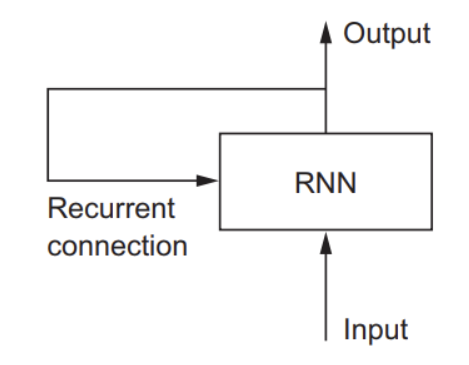

## What is Recurrent Neural Network (RNN)?
RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer. It uses previous (past) sequence by the 'loop' and predict the future.

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:/Users/USER/Desktop/프로젝트/2021_10_ML Online Course')

In [3]:
df = pd.read_csv('./corona_daily.csv', usecols=[3], engine='python', skipfooter=3)

### df contains daily confirmed COVID-19 cases in Wuhan, China

In [7]:
df.shape

(112, 1)

In [8]:
dataset = df.values

# to set dataframe in numeric format
dataset = df.astype('float32')

## MinMaxScaler
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [11]:
#defining the sequence the look back the past features
def create_dataset(dataset, look_back=10):
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back-1):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

In [12]:
# This model will use previous three days to predict the future
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [13]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [14]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 [==============================] - 0s 3ms/step - loss: 2.5775e-04 - val_loss: 3.2453e-04
Epoch 2/100
85/85 [==============================] - 0s 985us/step - loss: 2.5831e-04 - val_loss: 2.3271e-04
Epoch 3/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5677e-04 - val_loss: 2.3128e-04
Epoch 4/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5476e-04 - val_loss: 1.6672e-04
Epoch 5/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5398e-04 - val_loss: 1.5554e-04
Epoch 6/100
85/85 [==============================] - 0s 962us/step - loss: 2.5225e-04 - val_loss: 2.3047e-04
Epoch 7/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5561e-04 - val_loss: 2.7044e-04
Epoch 8/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5287e-04 - val_loss: 2.1002e-04
Epoch 9/100
85/85 [==============================] - 0s 1ms/step - loss: 2.5506e-04 - val_loss: 1.6243e-04
Epoch 10/100
85/85 [=============

## What is an epoch?
An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass:
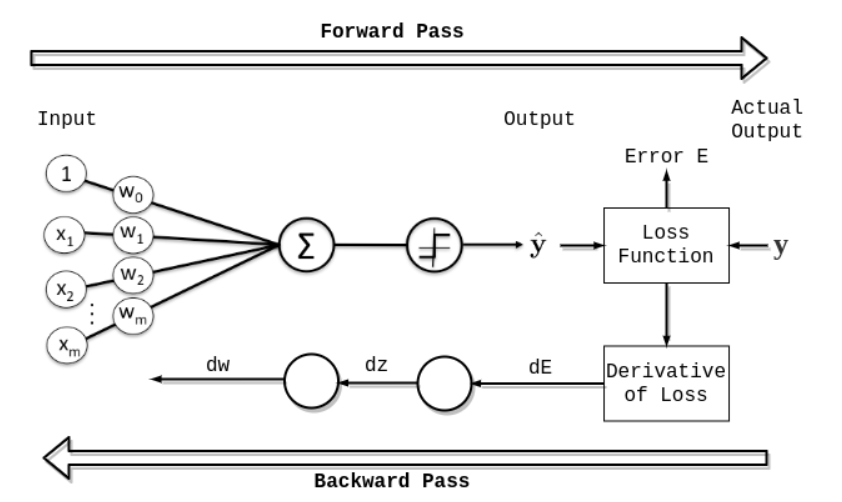

An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network. We call passing through the training examples in a batch an iteration.

An epoch is sometimes mixed with an iteration. To clarify the concepts, let’s consider a simple example where we have 1000 data points as presented in the figure below:

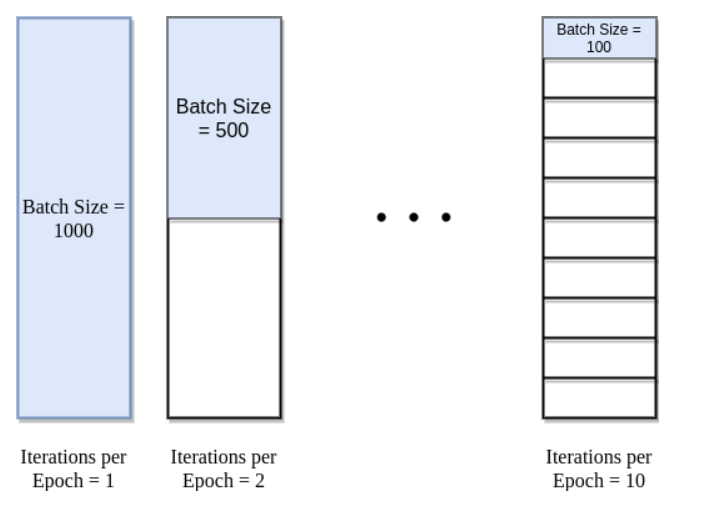

If the batch size is 1000, we can complete an epoch with a single iteration. Similarly, if the batch size is 500, an epoch takes two iterations. So, if the batch size is 100, an epoch takes 10 iterations to complete. Simply, for each epoch, the required number of iterations times the batch size gives the number of data points.

We can use multiple epochs in training. In this case, the neural network is fed the same data more than once.

### Key notes
#### 1) Epoch consists 'both' feedforward and backward pass, named as 'iteration'.
#### 2) The required number of iteration (epoch) * batch size = number of data points (Features)
##### For instance, 10 data points, 5 batch size -> 2 iteration (epochs)

In [16]:
# getting the prediction of training data
trainPredict = model.predict(X_train)

# getting the prediction of testing/validation data
testPredict = model.predict(X_test)

# In neural network you have to inverse the value back, you've used MinMaxScaler here
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

In [17]:
# Evaluation score
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 192.40 RMSE
Test Score: 152.86 RMSE


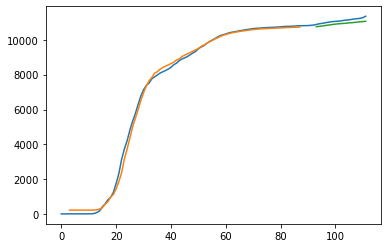

In [18]:
# Blue line - real graph
# Orange line - Validation
# Green line - Prediction
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## However, the problem of RNN is that it's vulnerable to 'vanishing gradient' issue

The lower the gradient is, the harder it is for the network to update the weights and the longer it takes to get to the final result.

The output of the earlier layers is used as the input for the further layers. Thus, the training for the time point t is happening all along based on inputs that are coming from untrained layers. So, because of the vanishing gradient, the whole network is not being trained properly.

For the vanishing gradient problem, the further you go through the network, the lower your gradient is and the harder it is to train the weights, which has a domino effect on all of the further weights throughout the network.


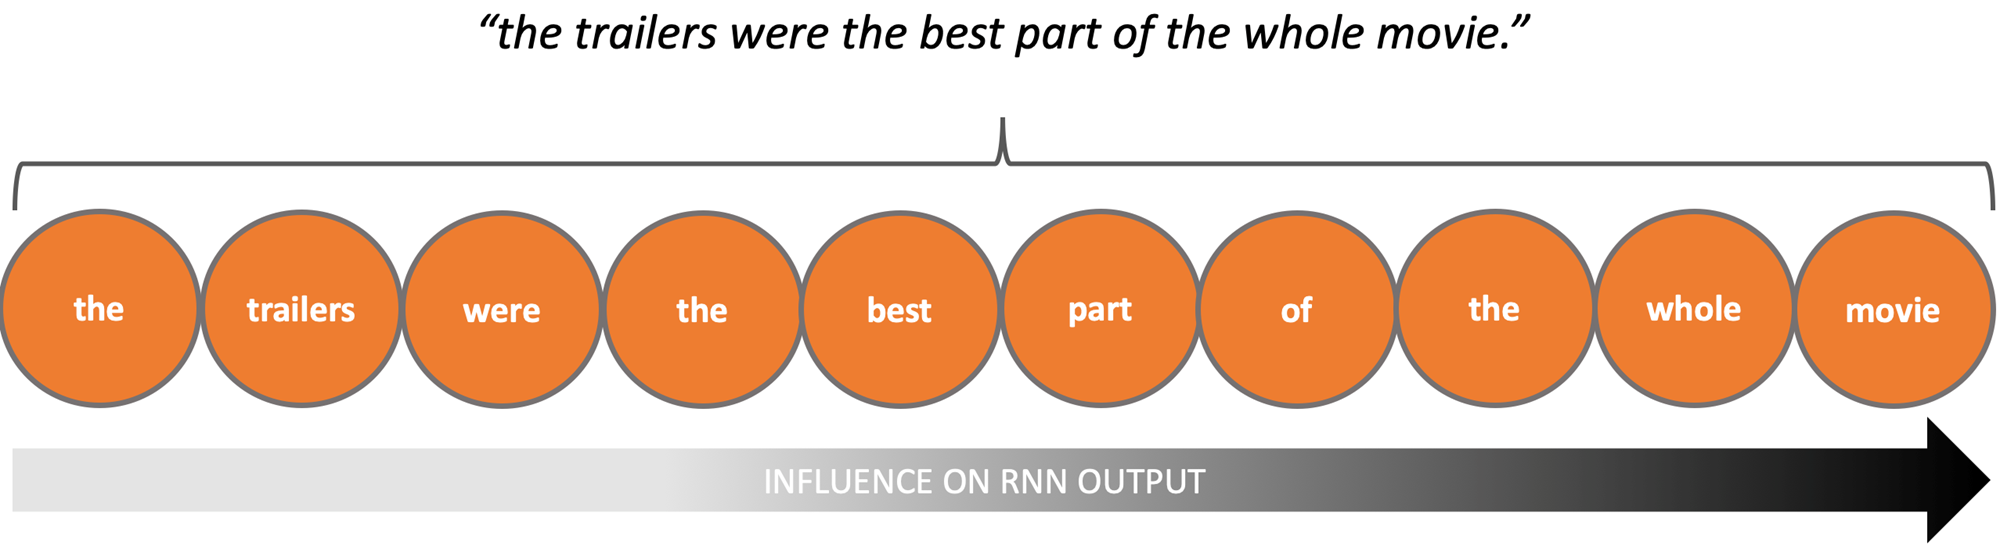

### ML scientists came up with updated version
# 1) LSTM (Long-short term memory) neural networks
# 2) GRU (Gated recurrent unit) neural networks

### Structure of LSTM

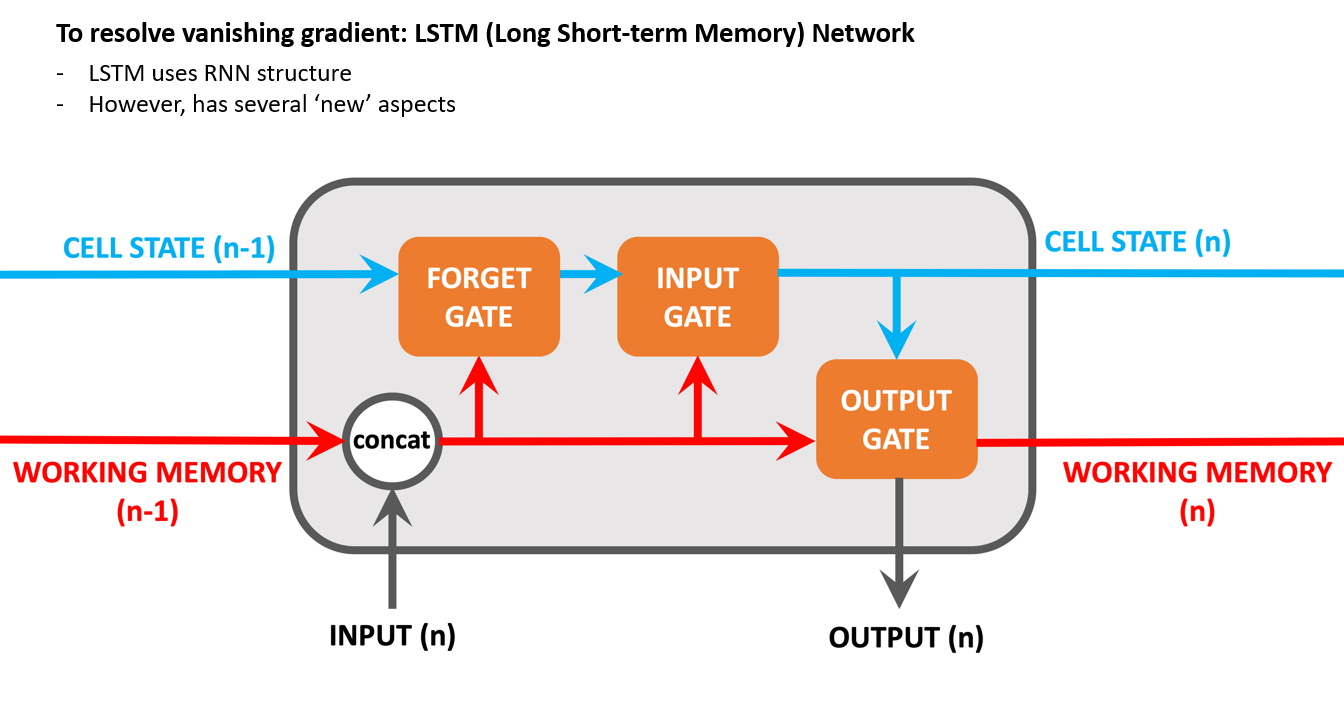

The key to LSTMs is the cell state, the horizontal line running through the top of the diagram. The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.


The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates; named as forget, input, and ouput gates

## Using sigmoid function in update or forget gate

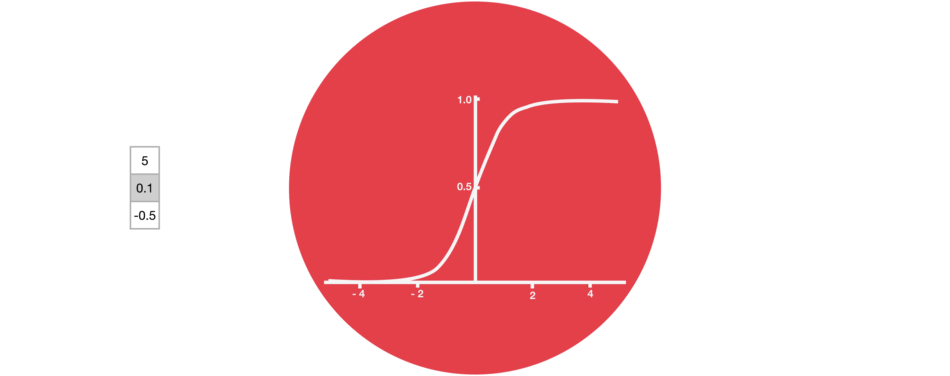

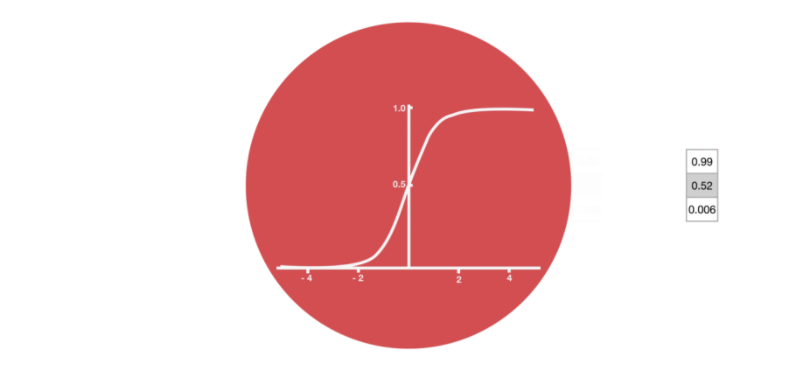

## See the difference?

## Now you may wonder how GRU is different with LSTM
###  The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.


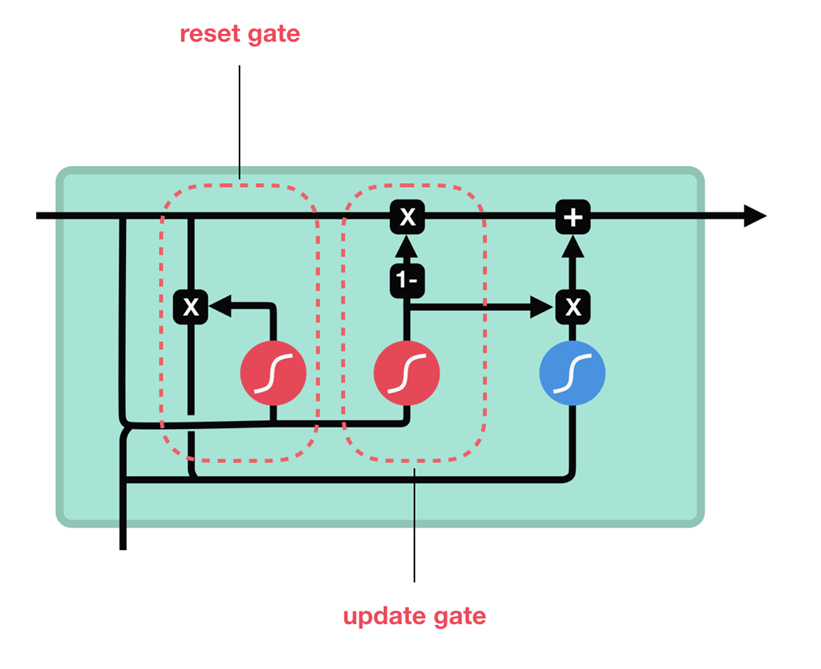

## Update Gate
### The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add. (It is also a variation of LSTM)

## Reset Gate
### The reset gate is another gate is used to decide how much past information to forget.

### Let's look at examples, the model is based on our published paper in Computer Science Conference
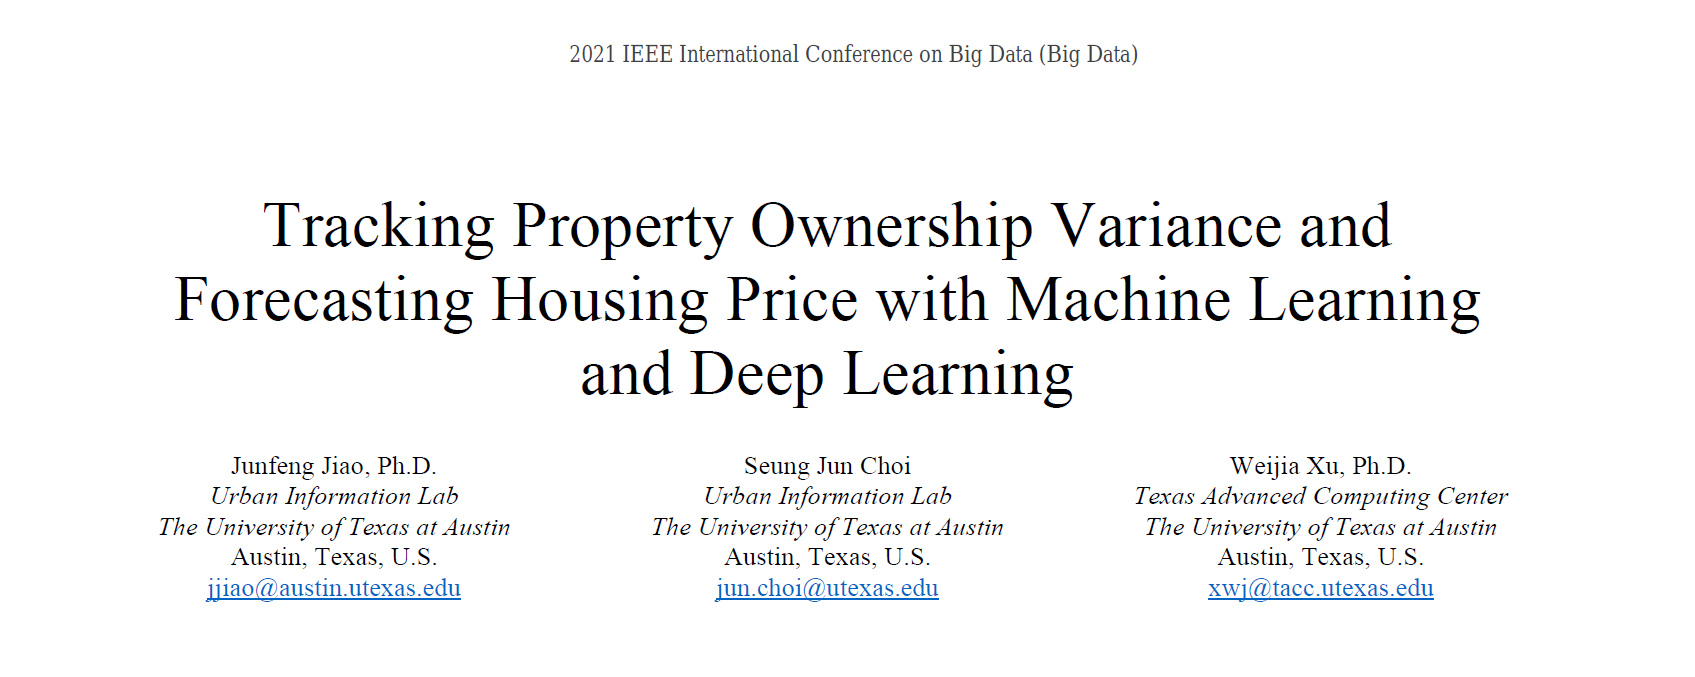

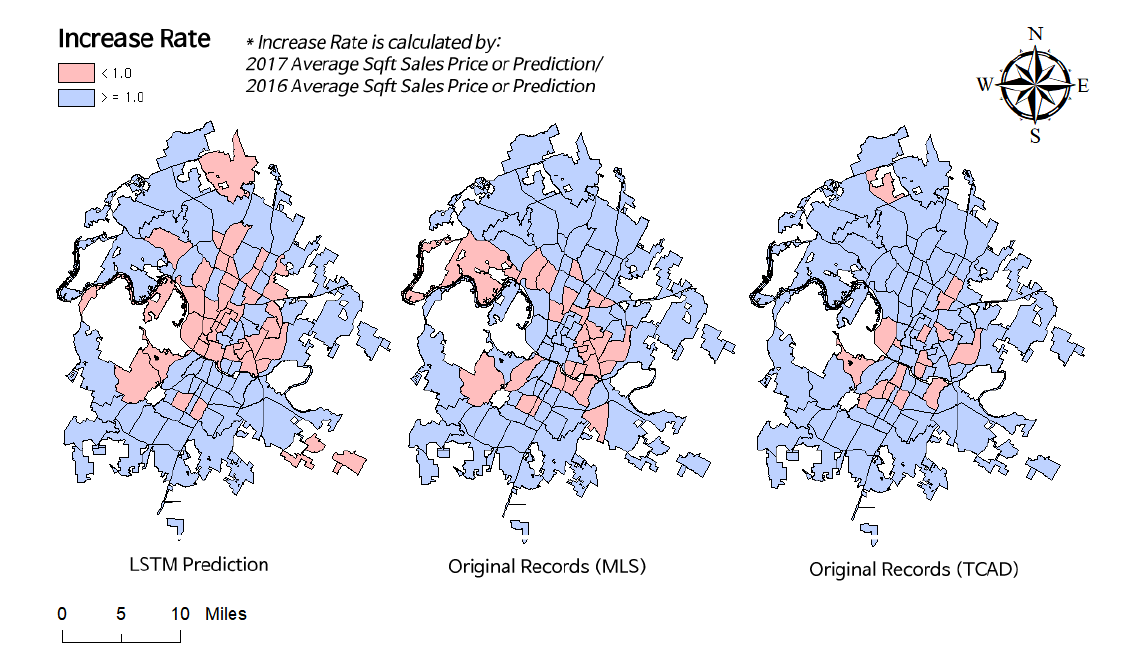

### Originally, I need to run Super Computer 
TACC
(Texas Advanced Computing Center) to train and test
data. Frontera has 39PF (Petaflops Peak Performance
with over 8,000 compute nodes, each equipped with
Intel Cascade Lake CPU and 128GB DDR4 memory.
Frontera is equipped with 50+ PB disk, 3PB of Flash
with 1.5TB/sec peak I/O rate. The training and testing
of deep learning models used GPU nodes on Frontera.
Each GPU node has four RTX5000 GPUs.

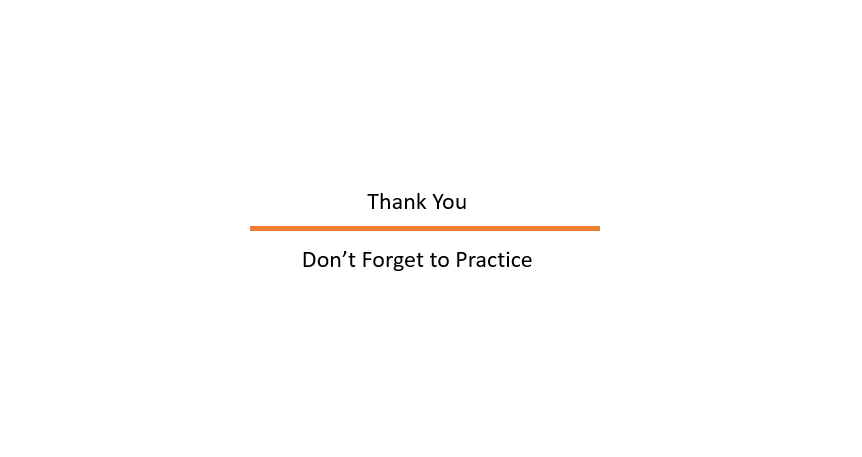